- ## Data Analysis:

This is in general looking at the data to figure out whats going on. Inspect the data: 
1. Check whether there is any missing data, irrelevant data and do a cleanup.
2. Data Visualization:
3. Feature selection.
4. Search for any trends, relations & correlations.
5. Draw an inference and predict whether the patient can be identified to behaving liver disease or not


In [24]:
#importing required libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline



## Data analysis

In [2]:
    #loading the dataset into pandas dataframe

liver = pd.read_csv('../data/indian_liver_patients.csv')
liver.head(5)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
#get information about the dataframe
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Label                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


- here, only gender attribute is in string/object format and we have to convert it into numric format
- using describe all function we can get statistical data about the dataframe




In [4]:
# display all the statistical data about the dataset
liver.describe(include = 'all')


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


- We can observe that the Albumin_and_Globulin_Ratio cloumn has 4 missing values,
- we either need to remove those rows or fill the missing values with mean/avg or keep it empty  

In [5]:
#display the attributes of the data
liver.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Label'],
      dtype='object')

In [6]:
# saving all the cloumns into cols variable
cols =['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
cols

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio']

In [7]:
# check for null values
liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Label                         0
dtype: int64

- Albumin_and_Globulin_Ratio colm has 4 missing values

In [8]:
#dropping th rows having null values
# replacing the null values with ' ' single space, store it in z variable
z = liver.fillna(' ')

In [9]:
z.isnull().sum()
# filled empty places with space

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Label                         0
dtype: int64

In [10]:
#removing label column

X = z.drop('Label',axis=1)
y = z['Label']

In [11]:
X.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74


In [12]:
y.describe

<bound method NDFrame.describe of 0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Label, Length: 583, dtype: int64>

In [13]:
#using label encoder

le = LabelEncoder()

In [14]:
# encoding all the values to string data type
X[cols] = X[cols].astype(str)

In [15]:
#converted all the attribute data of df into String format
X.dtypes

Age                           object
Gender                        object
Total_Bilirubin               object
Direct_Bilirubin              object
Alkaline_Phosphotase          object
Alamine_Aminotransferase      object
Aspartate_Aminotransferase    object
Total_Protiens                object
Albumin                       object
Albumin_and_Globulin_Ratio    object
dtype: object

In [16]:
X[cols] = X[cols].apply(LabelEncoder().fit_transform)
X.head(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,56,0,3,0,78,35,46,34,21,32
1,53,1,18,62,245,120,1,41,20,24


## **Data Visualization**


In [1]:
#plotting a heatmap to find correlation between different attributes
correlations = X.corr()
sns.set_theme(style='white',font='jetbrains mono',font_scale=0.7,palette='Pastel1')

cmap = sns.diverging_palette(190,600)
fig,ax = plt.subplots(figsize = (7,7), dpi=300)
sns.heatmap(correlations,fmt='0.2f',cmap=cmap,square=True,linewidths=0.5,annot=True,ax=ax)

NameError: name 'X' is not defined

In [18]:
#need to normalize data with scikit learn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


scaler =sc.fit_transform(X[cols].iloc[:,range(0,10)].values)

In [23]:
X.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,56,0,3,0,78,35,46,34,21,32
1,53,1,18,62,245,120,1,41,20,24
2,53,1,101,53,210,115,143,36,21,31


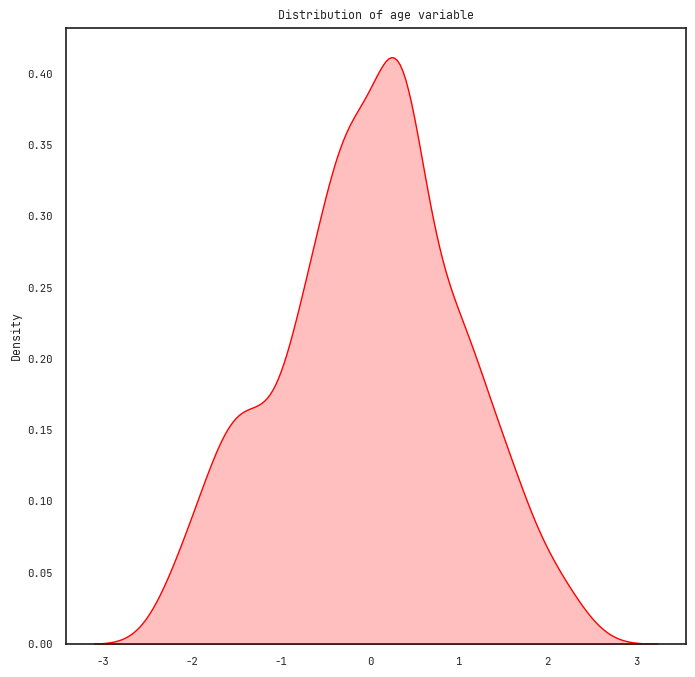

In [20]:
#KDE plot for this dataset

f, ax  =plt.subplots(figsize=(8,8))

x = pd.Series(X.all(),name="Age Variable")
ax  =sns.kdeplot(scaler[:,9],fill=True,color='red')
ax.set_title("Distribution of age variable")
plt.savefig('../data/kde1.png')
plt.show()



<AxesSubplot: xlabel='Total_Protiens', ylabel='Density'>

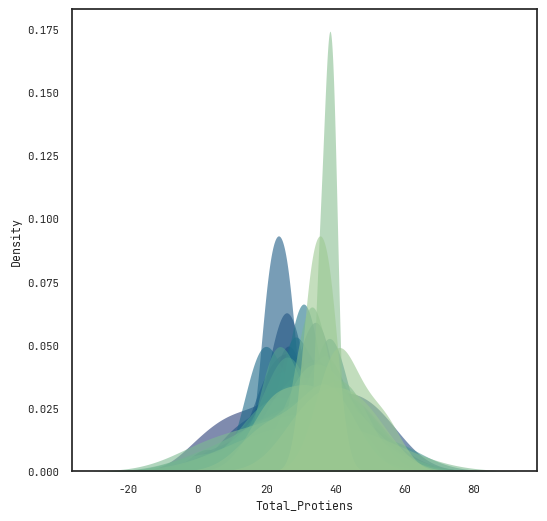

In [22]:
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(
   data=X, x="Total_Protiens", hue="Age",
   fill=True, common_norm=False,warn_singular=False,legend=False, palette="crest",
   alpha=.6, linewidth=0, ax=ax
) 